<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 173.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 147.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 165.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 132.2 MB/s eta 0:00:00


Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [7]:
## Write your code here
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
5               6                        I code primarily as a hobby   
6               7  I am not primarily a developer, but I write co...   
7               8                              I am learning to code   
8               9                        I code primarily as a hobby   
9              10                     I am a developer by profession   
9937         9938                     I am a developer by profession   
18521       18522                     I am a developer by profession   
22000       22001  I am not primarily a develope

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
# Identify duplicate rows based on MainBranch, Employment, and RemoteWork
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_rows_subset = df[df.duplicated(subset=subset_columns, keep=False)]

# Display the duplicate rows
print("Duplicate Rows based on MainBranch, Employment, and RemoteWork:")
print(duplicate_rows_subset)
print(f"Number of duplicate rows: {len(duplicate_rows_subset)}")

# Analyze which columns have identical values in duplicate rows
identical_columns = duplicate_rows_subset.nunique() == 1
print("\nColumns with identical values in duplicate rows (nunique == 1):")
print(identical_columns[identical_columns].index.tolist())

Duplicate Rows based on MainBranch, Employment, and RemoteWork:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Emplo

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


Number of duplicate rows: 40


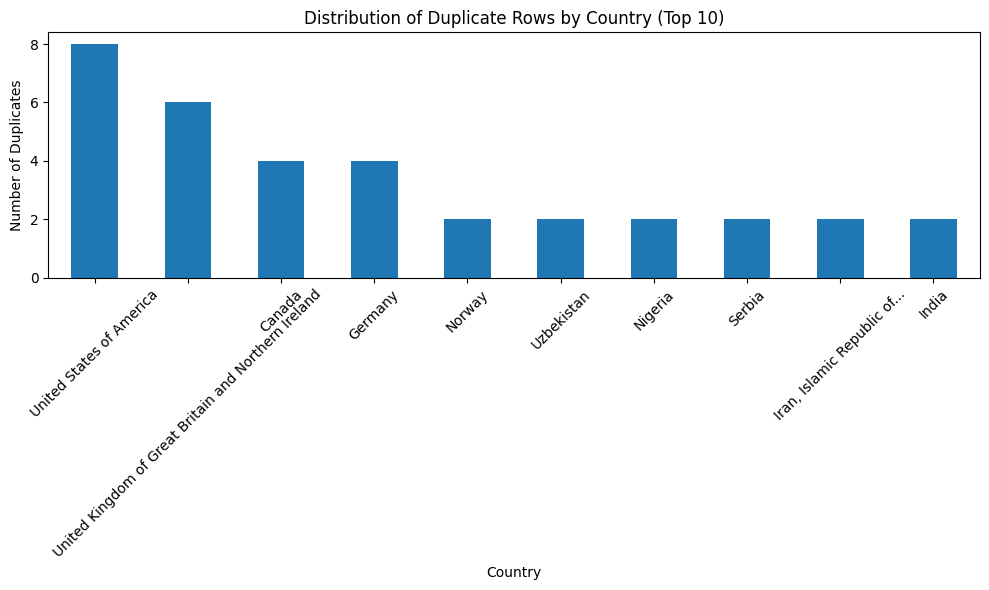

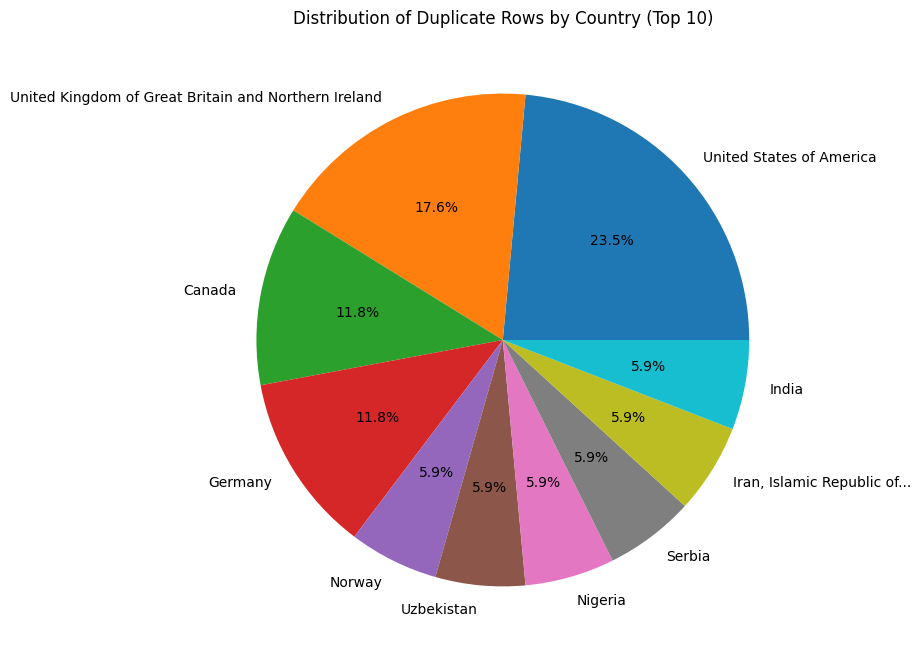

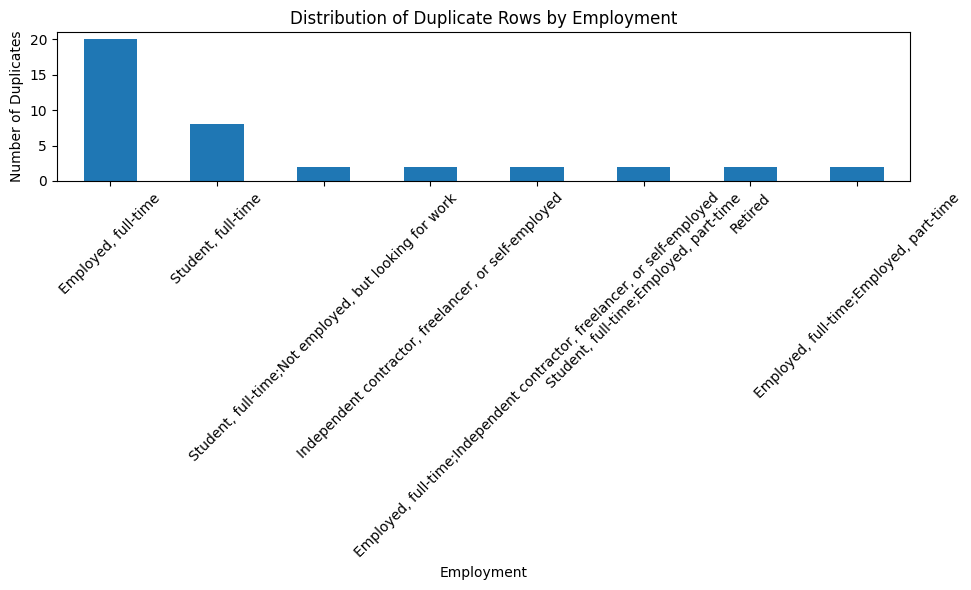

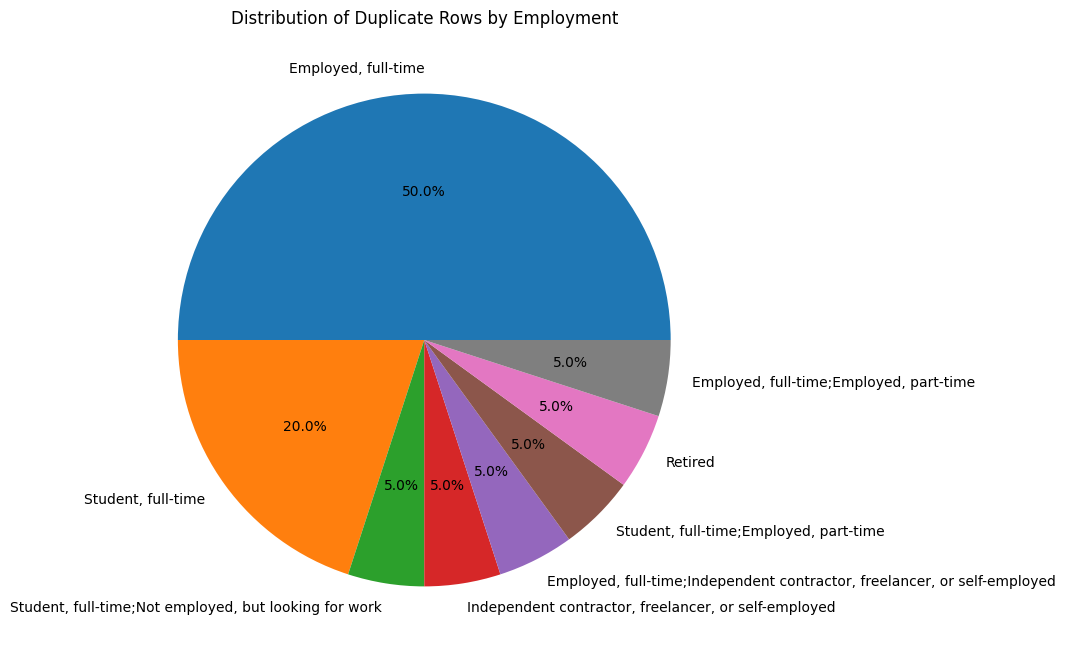

In [9]:
## Write your code here
duplicate_rows = df[df.duplicated(keep=False)]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Distribution of duplicates by Country
country_dist = duplicate_rows['Country'].value_counts().head(10)  # Top 10 countries

# Bar chart for Country
plt.figure(figsize=(10, 6))
country_dist.plot(kind='bar')
plt.title('Distribution of Duplicate Rows by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for Country
plt.figure(figsize=(8, 8))
country_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Duplicate Rows by Country (Top 10)')
plt.ylabel('')
plt.show()

# Distribution of duplicates by Employment
employment_dist = duplicate_rows['Employment'].value_counts()

# Bar chart for Employment
plt.figure(figsize=(10, 6))
employment_dist.plot(kind='bar')
plt.title('Distribution of Duplicate Rows by Employment')
plt.xlabel('Employment')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie chart for Employment
plt.figure(figsize=(8, 8))
employment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Duplicate Rows by Employment')
plt.ylabel('')
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [10]:

# Step 1: Decide which columns are critical for uniqueness
# Display column names and unique values to verify
print("Columns in the dataset:")
print(df.columns)

print("\nNumber of unique values per column:")
print(df.nunique())

# Define the subset of columns for uniqueness
subset_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'DevType']
print(f"\nSelected columns for defining uniqueness: {subset_columns}")

# Step 2: Remove duplicates based on the subset
# Check for duplicates based on the subset
duplicate_count = df.duplicated(subset=subset_columns, keep=False).sum()
print(f"Number of duplicate rows based on {subset_columns}: {duplicate_count}")

# Remove duplicates, keeping the first occurrence
df_no_duplicates = df.drop_duplicates(subset=subset_columns, keep='first')

# Display the shape before and after
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing duplicates: {df_no_duplicates.shape}")

# Step 3: Verify no duplicates remain
remaining_duplicates = df_no_duplicates.duplicated(subset=subset_columns, keep=False).sum()
print(f"Number of duplicate rows remaining after removal: {remaining_duplicates}")

# Optional: Display a sample of the cleaned dataset
print("\nSample of dataset after removing duplicates:")
print(df_no_duplicates.head())## Write your code here

Columns in the dataset:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Number of unique values per column:
ResponseId             65437
MainBranch                 5
Age                        8
Employment               110
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6113
JobSat                    11
Length: 114, dtype: int64

Selected columns for defining uniqueness: ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'DevType']
Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'DevType'

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
